In [1]:
import pandas as pd

uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri_filmes)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
# Tradução das colunas

filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
dados_dos_filmes = pd.concat([filmes, generos], axis = 1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [6]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [0 0 1 ... 1 0 1]


In [7]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.50656427  1.515208    1.63500866  1.43056397 -0.02166959
  -0.3258508  -0.20977243 -0.65369932  1.17637569 -0.09492563 -0.24073386
   0.61379695  0.24754125 -0.14781799 -0.291088    0.59526839 -0.4183692
  -0.1731221  -0.0765071 ]
 [ 0.03700475 -0.2883165  -0.24986422 -0.24216475 -0.18836431  0.24371852
  -0.27255817  0.13358428  0.12440407 -0.17486808 -0.08960557 -0.14419372
  -0.10858543  0.02337887 -0.21736885  0.19518808 -0.233489   -0.48282772
   0.08592333  0.04659106]
 [-0.05917995  0.43839076 -0.15731738 -0.23558211 -0.26251527 -0.57352205
   0.81615018 -0.21556327  0.02805549 -0.16798305  0.26222518  0.4658932
  -0.04606302 -0.17962576  0.59495429 -0.32267181  0.26265523  1.36647764
  -

In [8]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns = generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.506564,1.515208,1.635009,1.430564,-0.021670,-0.325851,-0.209772,-0.653699,1.176376,-0.094926,-0.240734,0.613797,0.247541,-0.147818,-0.291088,0.595268,-0.418369,-0.173122,-0.076507
1,0.037005,-0.288316,-0.249864,-0.242165,-0.188364,0.243719,-0.272558,0.133584,0.124404,-0.174868,-0.089606,-0.144194,-0.108585,0.023379,-0.217369,0.195188,-0.233489,-0.482828,0.085923,0.046591
2,-0.059180,0.438391,-0.157317,-0.235582,-0.262515,-0.573522,0.816150,-0.215563,0.028055,-0.167983,0.262225,0.465893,-0.046063,-0.179626,0.594954,-0.322672,0.262655,1.366478,-0.119587,-0.073514


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>], dtype=object)

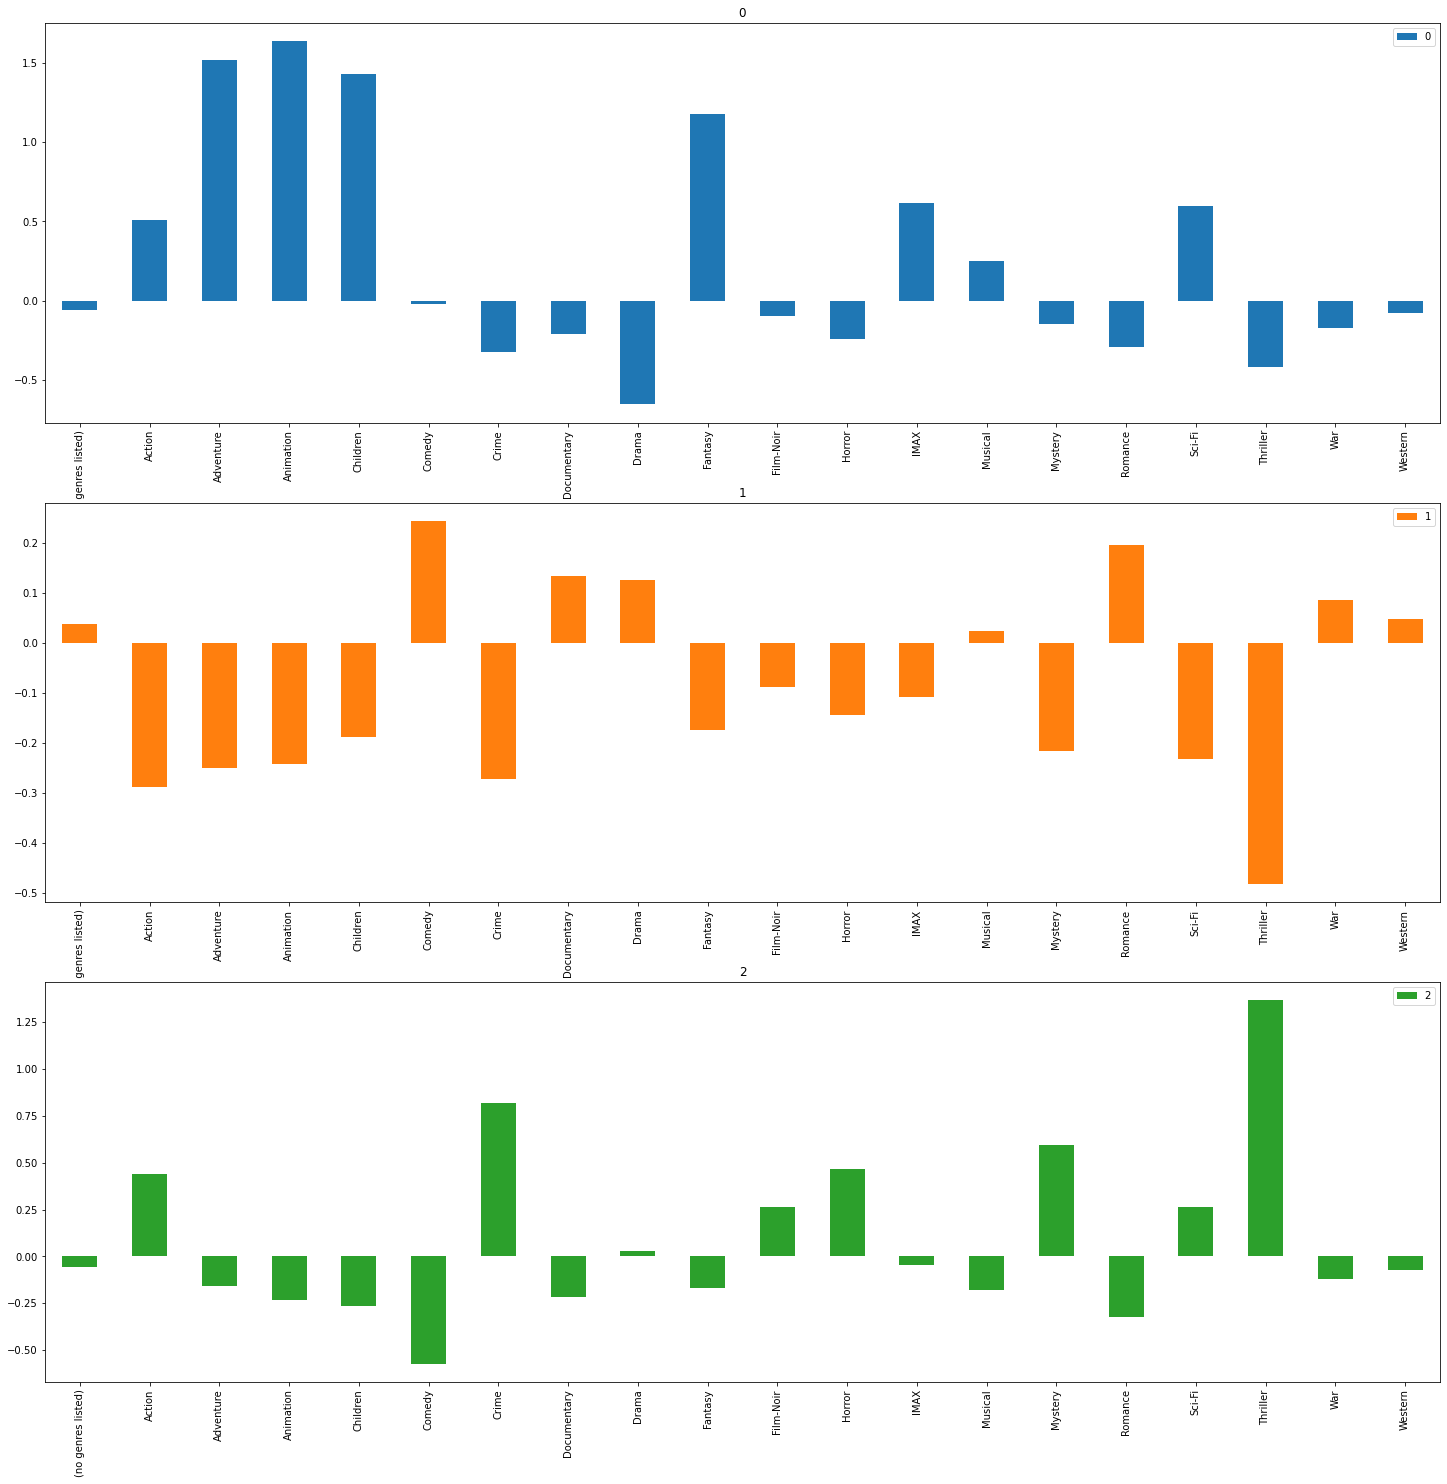

In [9]:
grupos.T.plot.bar(subplots=True,
                figsize=(25,25),
                sharex=False)

In [10]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2436,3249,"Hand That Rocks the Cradle, The (1992)",Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
663,869,Kansas City (1996),Crime|Drama|Musical|Thriller,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1009,1320,Alien³ (a.k.a. Alien 3) (1992),Action|Horror|Sci-Fi|Thriller,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2389,3169,The Falcon and the Snowman (1985),Crime|Drama|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2272,3015,Coma (1978),Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6489,53127,Bug (2007),Drama|Horror|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4469,6597,"Princess Blade, The (Shura Yukihime) (2001)",Action|Sci-Fi,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7555,85354,Mesrine: Public Enemy #1 (L'ennemi public n°1)...,Action|Crime,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9089,143367,Silence (2016),Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8572,116823,The Hunger Games: Mockingjay - Part 1 (2014),Adventure|Sci-Fi|Thriller,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [11]:
from sklearn.manifold import TSNE

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
print(visualizacao)

[[-42.397015   13.024725 ]
 [ 41.888374   57.436184 ]
 [  7.211617   30.981407 ]
 ...
 [ 32.49211     3.431236 ]
 [-46.1643    -10.667044 ]
 [ -4.1827283   6.6467743]]


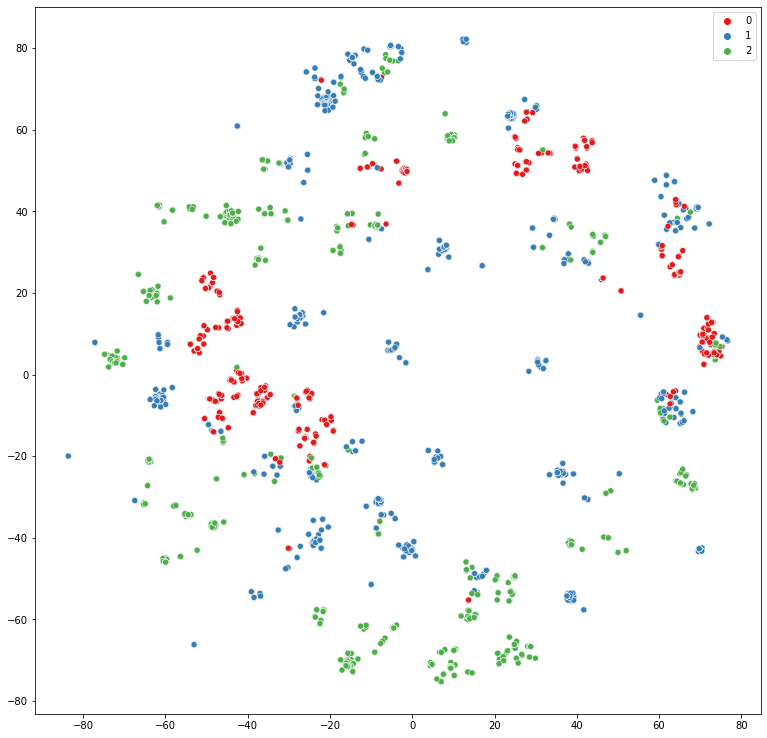

In [12]:
import seaborn as sns

ax = sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue = modelo.labels_,
                palette=sns.color_palette('Set1', 3))
ax.figure.set_size_inches(13,13)

In [13]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.274474,-0.355363,-0.258679,-0.270451,-0.369958,-0.213054,-0.217489,-0.562775,-0.073853,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.359358,-0.334435,0.659667,-0.202020,-0.132065
1,-0.05918,-0.436164,-0.290794,-0.258679,-0.245085,0.485636,-0.374632,-0.217489,0.317405,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.328363,-0.438184,-0.202020,-0.132065
2,-0.05918,0.401861,-0.354678,-0.258679,-0.203763,-0.390712,-0.342658,-0.217489,-0.481981,-0.248337,-0.094926,0.917280,-0.128397,-0.188419,-0.249986,-0.272349,2.990120,0.427111,-0.202020,-0.132065
3,-0.05918,-0.120684,1.559782,2.747063,3.697524,0.241864,-0.295052,-0.217489,-0.657080,0.452194,-0.094926,-0.323181,-0.128397,-0.188419,-0.166649,-0.327849,-0.019363,-0.491259,-0.168346,-0.132065
4,-0.05918,-0.480607,-0.385949,-0.258679,-0.216465,-0.792126,-0.374632,-0.217489,0.983121,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.009955,-0.202020,-0.132065


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>,
       <AxesSubplot:title={'center':'17'}>,
       <AxesSubplot:title={'center':'18'}>,
       <AxesSubplot:title={'center':'19'}>], dtype=object)

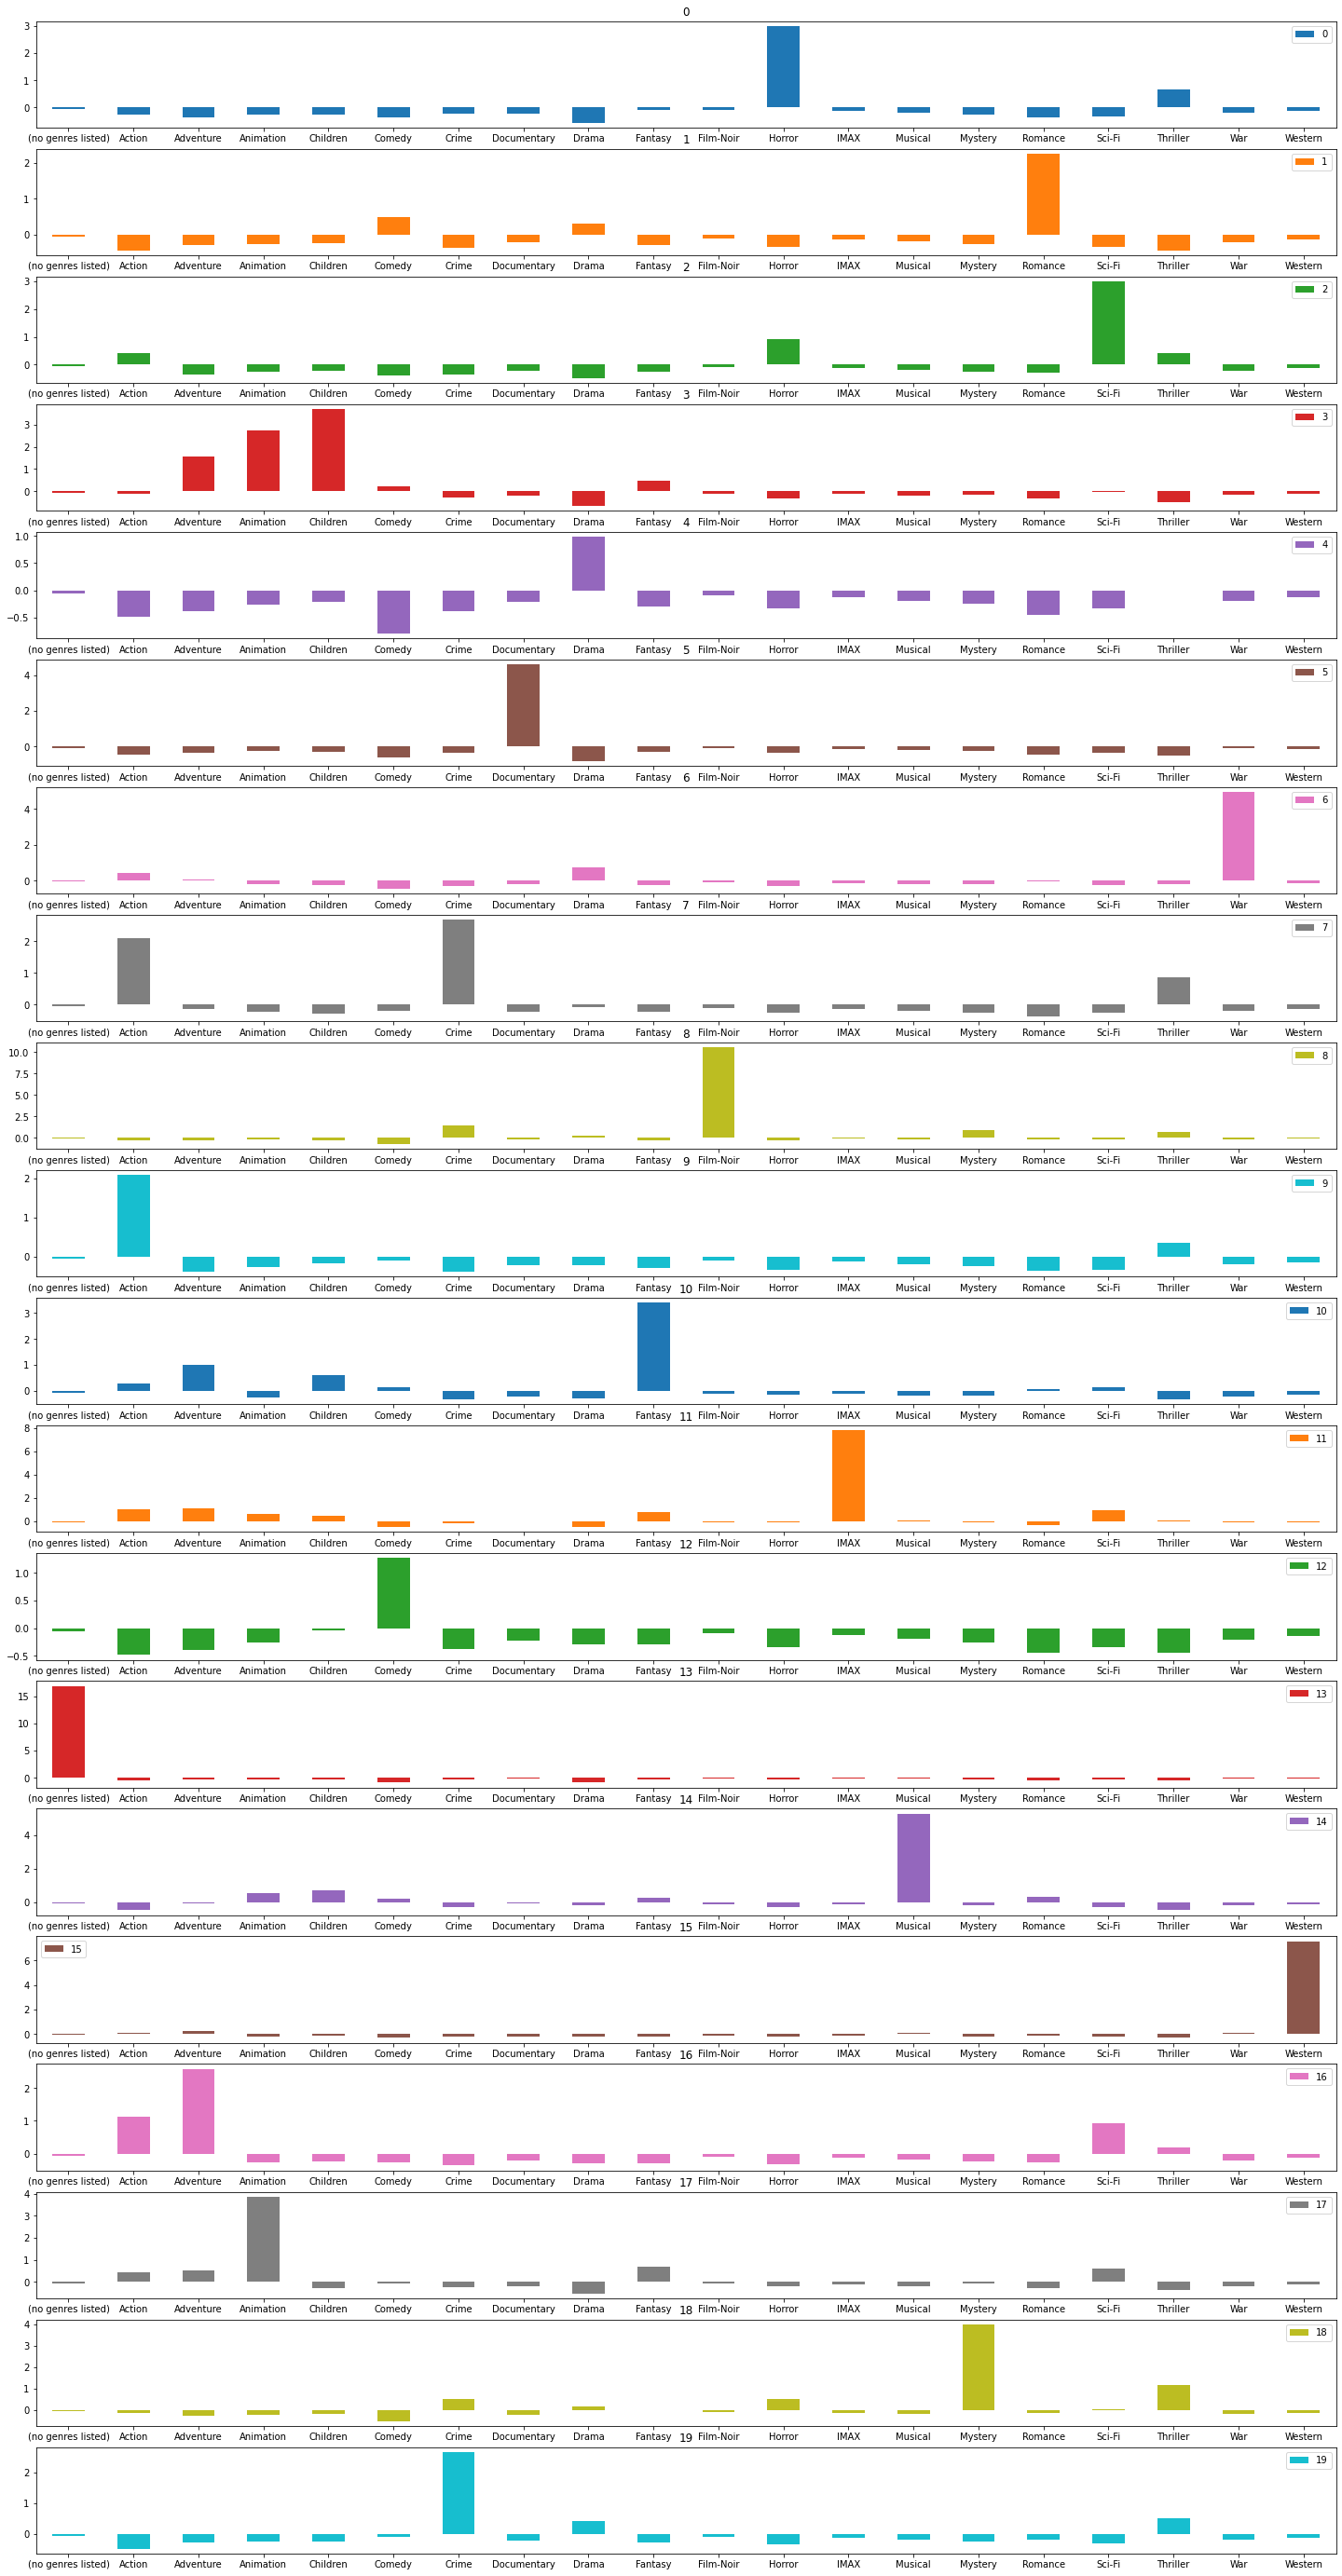

In [14]:
grupos.T.plot.bar(subplots=True,
                figsize=(25,50),
                sharex=False,
                rot=0)

In [15]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6024,38583,"Wraith, The (1986)",Action|Horror|Sci-Fi|Thriller,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
7437,80917,Monsters (2010),Drama|Sci-Fi,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9195,150596,Doctor Who: The Husbands of River Song (2015),Comedy|Drama|Sci-Fi,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6954,65642,"Timecrimes (Cronocrímenes, Los) (2007)",Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
6059,40697,Babylon 5,Sci-Fi,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2280,3024,Piranha (1978),Horror|Sci-Fi,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3598,4939,"Final Countdown, The (1980)",Action|Sci-Fi,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9332,160565,The Purge: Election Year (2016),Action|Horror|Sci-Fi,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3569,4887,"One, The (2001)",Action|Sci-Fi|Thriller,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8778,128975,Hot Tub Time Machine 2 (2015),Comedy|Sci-Fi,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
def kmean(numero_de_clusters, generos):
    modelo = KMeans(n_clusters=numero_de_clusters)
    modelo.fit(generos)
    return [numero_de_clusters, modelo.inertia_]

In [17]:
resultado_erro = [kmean(i, generos_escalados) for i in range(1, 41)]
resultado_erro

[[1, 194839.9999999991],
 [2, 179451.6591017117],
 [3, 167453.02779545606],
 [4, 157556.69155743302],
 [5, 147451.03511627376],
 [6, 136146.5145445881],
 [7, 128798.2227368544],
 [8, 121409.74988550598],
 [9, 110872.10118377014],
 [10, 102325.14905347874],
 [11, 93911.24023319678],
 [12, 88838.48167536884],
 [13, 78596.66195995736],
 [14, 73520.12408299114],
 [15, 69372.63952974902],
 [16, 64387.593148125634],
 [17, 61733.37288838007],
 [18, 58550.3610999456],
 [19, 57034.97991248869],
 [20, 56596.64187203088],
 [21, 52962.0084835766],
 [22, 51139.65873645536],
 [23, 50748.84627926635],
 [24, 49203.88449363929],
 [25, 47796.42499777687],
 [26, 46447.705061492554],
 [27, 45844.688145316606],
 [28, 44766.76746095753],
 [29, 44157.06332273422],
 [30, 41726.17763452297],
 [31, 43153.25940014655],
 [32, 41213.601467327164],
 [33, 39828.744391537446],
 [34, 39183.40012845866],
 [35, 38329.83204585128],
 [36, 37571.09312448863],
 [37, 37074.061764390826],
 [38, 36471.5062002011],
 [39, 35894.

In [18]:
resultado_erros = pd.DataFrame(resultado_erro,
                                columns=['n_clusters', 'EQM'])
resultado_erros.head()

,n_clusters,EQM
0,1,194840.000000
1,2,179451.659102
2,3,167453.027795
3,4,157556.691557
4,5,147451.035116


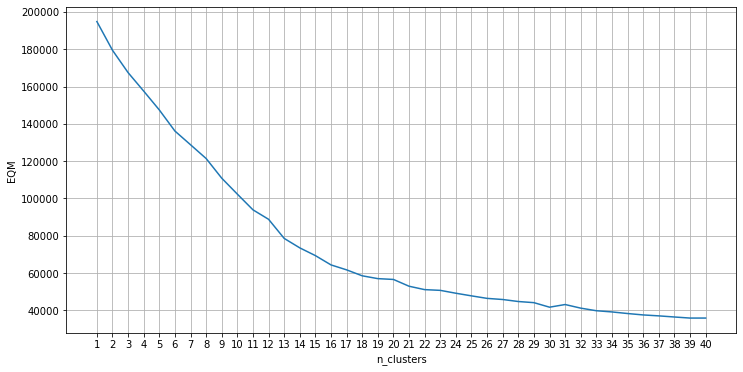

In [19]:
import numpy as np

ax = sns.lineplot(data = resultado_erros, y="EQM", x='n_clusters')
ax.figure.set_size_inches(12,6)
ax.set_xticks(np.arange(1,41))
ax.grid()

ax;


In [20]:
modelo = 

SyntaxError: invalid syntax (<ipython-input-20-c93073008241>, line 1)